**Цель задания** — визуализировать временной ряд, чтобы выявить тренды, сезонность и возможные аномалии. Поскольку данные охватывают несколько лет с полными 12 месяцами в каждом году, важно выбрать такой тип графика, который позволит наглядно отобразить изменения количества пассажиров с течением времени.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import acf

url='https://drive.google.com/file/d/1MY5-bEFb9i8PpZEUU_f8cFFiQKsvLwFO/view?usp=drive_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
# считываем датасет

df.head(10)
# смотрим что из себя представляет данный датасет, либо с 
# помощью команды .head(), либо с помощью команды .columns

df.isnull().sum()
# ищем пропуски

duplicates = df.duplicated()
duplicate_rows = df[duplicates]
duplicate_rows
# ищем дубликаты

# Преобразование столбца 'Month' в формат даты (при необходимости)
# Если у вас дата в формате YYYY-MM:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')

# Переименование столбца для удобства
df = df.rename(columns={'#Passengers': 'Passengers'})

# Производим выборку по году если хотим выполнить следующий шаг и сгруппировать по году с расчетом суммы пассажиров на каждый год
df['Year'] = df['Month'].dt.year

# Группируем по году и расчитываем сумму пассажиров за каждый год
grouped = df.groupby('Year')['Passengers'].sum()
grouped
# будет ошибка если колонка Month преобразована в индексы, тк к мы будем пытаться обратиться к несуществующей колонке

# print(f"Количество записей: {len(df)}")

Количество записей: 144


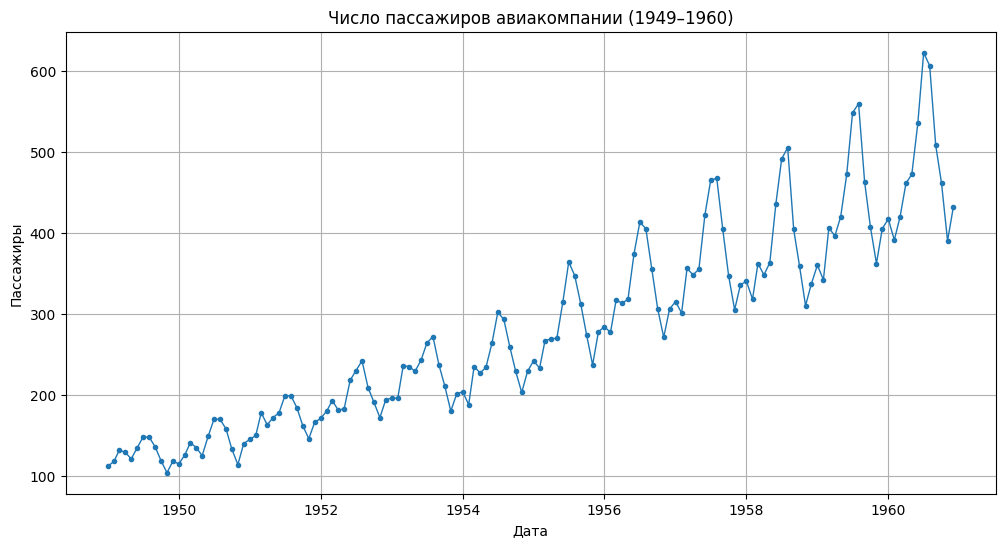

In [6]:
import matplotlib.pyplot as plt

# Установка столбца 'Month' в качестве индекса
df = df.set_index(['Month'])

plt.figure(figsize=(12, 6)) # размер рисунка в дюймах
plt.plot(df.index, df['Passengers'], marker='o', linestyle='-', linewidth=1, markersize=3) # функция для построения линий на графике, где в данном случае, мы выбираем два аргумента, сначала для оси X, затем для оси Y, после чего последующими аргументами производим настройку графика
plt.title('Число пассажиров авиакомпании (1949–1960)') # название графика
plt.xlabel('Дата') # название для колонки по оси X
plt.ylabel('Пассажиры') # название для колонки по оси Y
plt.grid(True) # включили сетку на графике
plt.show() # показать график иил отобразить


**Выводы по графику:**
* Тренд: Четкий восходящий тренд — число пассажиров растет с каждым годом.
* Сезонность: Ежегодные пики присутствуют, но дать больше конкретики по данному графику не представляется возможным.
* Аномалии: Присутствуют некоторые отклонения.

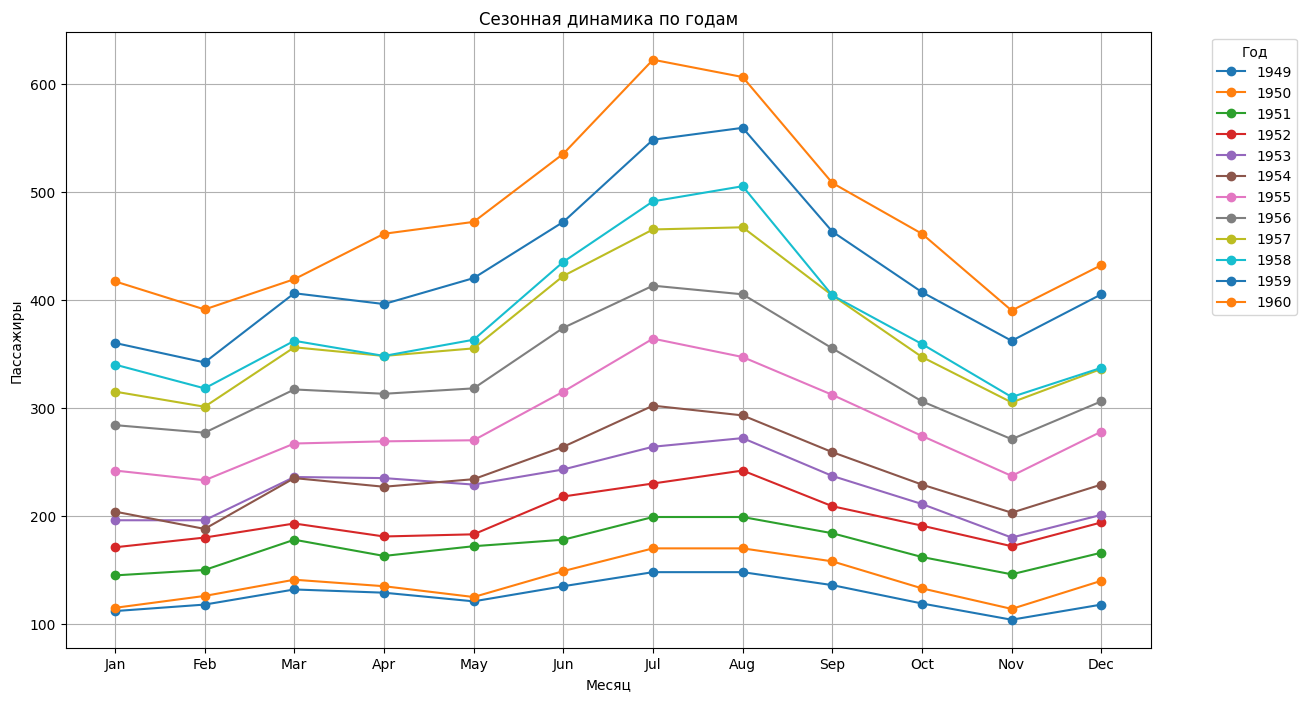

In [9]:
# Создаем колонку с годом
df['Year'] = df.index.year

# Построение графика
plt.figure(figsize=(14, 8)) # размер рисунка в дюймах
for year in df['Year'].unique(): # выбираем и возвращаем уникальные значения из столбца Year
    year_data = df[df['Year'] == year] # фильтрация DataFrame, выбирая только строки, где значение в столбце 'Year' равно текущему году из цикла. 
    #Результат сохраняется в year_data.
    plt.plot(year_data.index.month, year_data['Passengers'], label=year, marker='o') # извлекаем номер месяца из индекса year_data, это будет ось X графика. Далее звлекаем значения количества пассажиров из соответствующего столбца в year_data, это будет ось Y графика.
    # label=year:  Устанавливает метку для линии, соответствующую году.  Эта метка будет использована в легенде.
    # Цикл, который перебирает каждый уникальный год.

plt.title('Сезонная динамика по годам') # название графика
plt.xlabel('Месяц') # название для колонки по оси X
plt.ylabel('Пассажиры') # название для колонки по оси Y
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) # Устанавливает метки на оси X. Генерирует числа от 1 до 12 (номера месяцев), при этом каждое число соответствует списку сокращенных названий месяцев.
plt.legend(title='Год', bbox_to_anchor=(1.05, 1), loc='upper left') # создаем блок легенды на графике
plt.grid(True) # включить сетку
plt.show() # отобразить график

**Выводы по графику:**
* Сравнение лет: В 1949-го по 1960-е сезонные пики становятся выше, что подтверждает общий тренд роста.
* Стабильность сезонности: Паттерны повторяются каждый год, что говорит о стабильности спроса.

# График с трендом
**Простое скользящее среднее (SMA)**

$SMA(n) = \frac{\sum_{i=1}^{n} P_i}{n}$

Где:

* SMA - простое скользящее среднее
* Pᵢ - значение цены (или другого показателя) в период i
* n - длина периода (количество периодов, используемых для расчета среднего)

Cкользящее среднее за 12 месяцев используется для сглаживания сезонных колебаний, чтобы лучше видеть общий тренд. То есть, вместо того чтобы смотреть на каждый месяц отдельно, мы усредняем данные за год, чтобы убрать шумы и выделить долгосрочную тенденцию.
<!-- Взвешенное скользящее среднее (WMA)

$WMA(n) = \frac{\sum_{i=1}^{n} w_i \cdot P_i}{\sum_{i=1}^{n} w_i}$

Где:

* WMA - взвешенное скользящее среднее
* Pᵢ - значение цены (или другого показателя) в период i
* wᵢ - вес, присвоенный значению в период i (вес обычно больше для более новых периодов)
* Σwᵢ - сумма всех весов


Экспоненциальное скользящее среднее (EMA)

$EMA(t) = \alpha \cdot P_t + (1 - \alpha) \cdot EMA(t-1)$

Где:

* EMAₜ - экспоненциальное скользящее среднее в период t
* α - коэффициент сглаживания (0 < α ≤ 1),  часто рассчитывается как α = 2 / (n + 1), где n - период
* Pₜ - значение цены (или другого показателя) в период t
* EMAₜ₋₁ - экспоненциальное скользящее среднее в предыдущий период t-1 -->

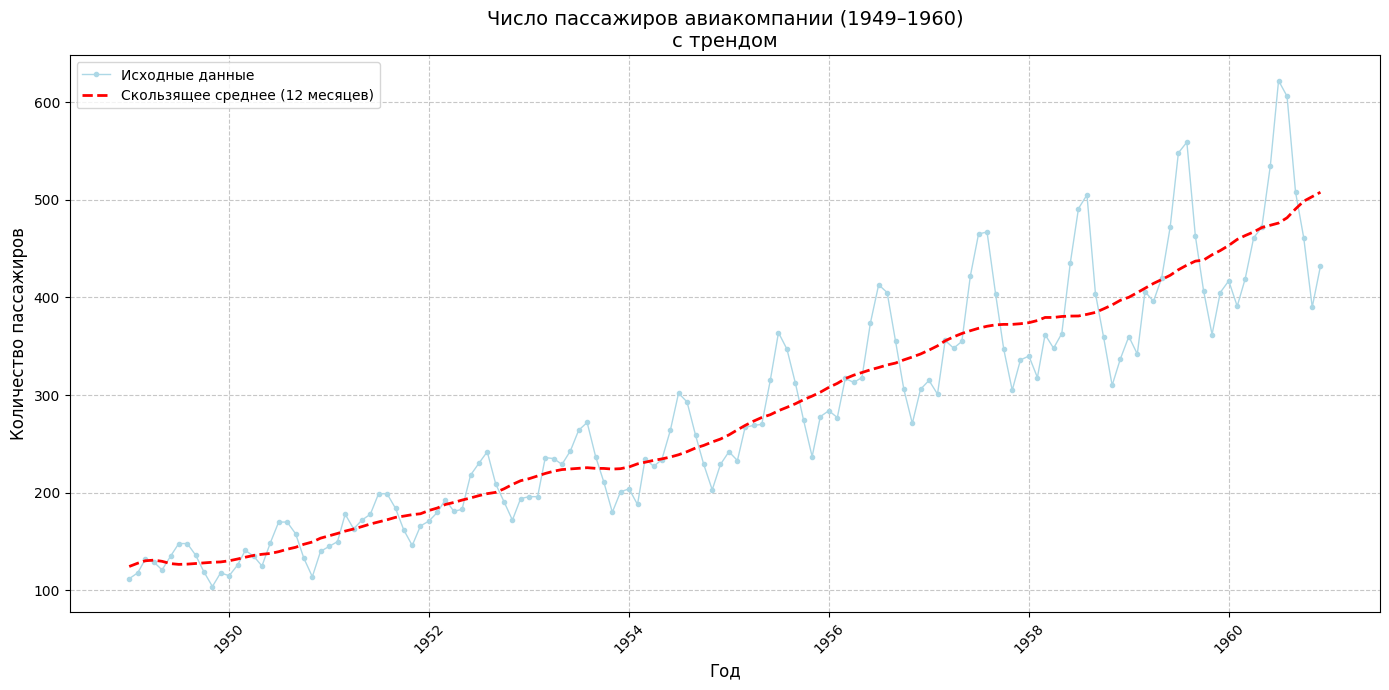

In [14]:
import matplotlib.pyplot as plt

# Добавление колонки со скользящим средним за 12 месяцев
df['SMA_12'] = df['Passengers'].rolling(window=12, center=True, min_periods=1).mean()
# Пояснение:
# - window=12: окно из 12 месяцев.
# - min_periods=1: рассчитать среднее, даже если в окне есть 1 значение (для первых месяцев).

plt.figure(figsize=(14, 7))

# Исходные данные
plt.plot(df.index, df['Passengers'], 
         label='Исходные данные', 
         color='lightblue', 
         linewidth=1,
         marker='o',
         markersize=3)

# Скользящее среднее
plt.plot(df.index, df['SMA_12'], 
         label='Скользящее среднее (12 месяцев)', 
         color='red', 
         linestyle='--', 
         linewidth=2)

# Настройки графика
plt.title('Число пассажиров авиакомпании (1949–1960)\nс трендом', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Количество пассажиров', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(rotation=45)  # поворот подписей дат
plt.tight_layout()  # автоматическая настройка отступов
plt.show()

**Основные наблюдения**
Исходные данные (серая/голубая линия):
* Четко выражены сезонные колебания с пиками и спадами, повторяющимися ежегодно.
* Максимальные значения приходятся на летние месяцы (июль-август), минимальные — на осенне-зимний период (октябрь-февраль).
* Амплитуда колебаний увеличивается с течением времени, что указывает на рост общего спроса.

Скользящее среднее за 12 месяцев (красная линия):
* Демонстрирует устойчивый восходящий тренд с 1949 по 1960 год.
* Количество пассажиров выросло примерно в 3–4 раза за 12 лет (с ~100–150 в 1949 до ~400–600+ в 1960).
* Трендовая линия сглаживает сезонные пики, подтверждая долгосрочный рост.

**Ключевые выводы**\
Положительный долгосрочный тренд:
* Рост числа пассажиров свидетельствует о развитии авиационной отрасли, расширении маршрутов или увеличении популярности авиаперелётов.
* Среднегодовой темп роста можно оценить в ~10–15% (на основе визуального анализа графика).

Сезонность:
* Ежегодные пики в летние месяцы связаны с туристическим сезоном и школьными каникулами.
* Осенне-зимние спады могут объясняться снижением деловой активности и предпочтением других видов транспорта.

Аномалии:
* В 1951 и 1955 годах заметны локальные снижения пассажиропотока, не соответствующие общему тренду.
* Возможные причины: экономические кризисы, рост цен на билеты, внешние события (например, забастовки).

Волатильность спроса:
* Увеличение амплитуды сезонных колебаний к 1960 году говорит о растущей зависимости бизнеса от сезонных факторов.
* Это требует оптимизации логистики и управления ресурсами (например, увеличение числа рейсов летом).